
<img src="../images/sklearn-workflow.png" alt="a 6 step machine learning framework along will tools you can use for each step"/>

[DOCUMENTATION](https://scikit-learn.org/stable/user_guide.html)

1. Getting the data ready
2. Choosing the right maching learning estimator/aglorithm/model for your problem
3. Fitting your chosen machine learning model to data and using it to make a prediction
4. Evaluting a machine learning model
5. Improving predictions through experimentation (hyperparameter tuning)
6. Saving and loading a pretrained model
7. Putting it all together in a pipeline


<img src="../images/ml_map.png" alt="map"/>

In [1]:
import sklearn
print(sklearn.__version__)

# import warnings
# warnings.filterwarnings("ignore")

sklearn.show_versions()

1.0.2

System:
    python: 3.9.7 (default, Sep 16 2021, 13:09:58)  [GCC 7.5.0]
executable: /home/priya/Desktop/ML/env/bin/python
   machine: Linux-5.11.0-27-generic-x86_64-with-glibc2.31

Python dependencies:
          pip: 21.2.4
   setuptools: 58.0.4
      sklearn: 1.0.2
        numpy: 1.21.2
        scipy: 1.7.3
       Cython: None
       pandas: 1.3.5
   matplotlib: 3.5.0
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# CLASSSIFICATION PROBLEM

In [3]:
# 1. Getting the data ready
heart_disease = pd.read_csv("../datasets/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# Create X (feature matrix)
X_clf = heart_disease.drop("target",axis=1)

# Create Y (lables)
Y_clf = heart_disease["target"]

In [10]:
# 2.Choosing the right maching learning estimator/aglorithm/model for your problem
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# Keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [11]:
# 3.Fitting your chosen machine learning model to data and using it to make a prediction
from sklearn.model_selection import train_test_split
X_clf_train,X_clf_test,Y_clf_train,Y_clf_test = train_test_split(X_clf,Y_clf,test_size=0.2)
print(X_clf.shape,X_clf_train.shape,Y_clf_train.shape,X_clf_test.shape,Y_clf_test.shape)

# # Split the data into train, validation & test sets

# train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
# valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
# X_train, y_train = X[:train_split], y[:train_split]
# X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
# X_test, y_test = X[valid_split:], y[:valid_split]

(303, 13) (242, 13) (242,) (61, 13) (61,)


In [12]:
clf.fit(X_clf_train,Y_clf_train);
X_clf_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2


In [13]:
# make a prediction
Y_clf_preds= clf.predict(X_clf_test)
Y_clf_preds,Y_clf_test

(array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0]),
 179    0
 78     1
 166    0
 214    0
 248    0
       ..
 173    0
 103    1
 38     1
 264    0
 245    0
 Name: target, Length: 61, dtype: int64)

In [14]:
# 4.Evaluting a machine learning model
clf.score(X_clf_train,Y_clf_train)

1.0

In [15]:
clf.score(X_clf_test,Y_clf_test)

0.7540983606557377

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_clf_test,Y_clf_preds))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
           1       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [17]:
confusion_matrix(Y_clf_test,Y_clf_preds)

array([[20,  9],
       [ 6, 26]])

In [18]:
accuracy_score(Y_clf_test,Y_clf_preds)

0.7540983606557377

In [19]:
# 5. Improving predictions through experimentation (hyperparameter tuning - different amount of n_estimators)
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators..")
    clf=RandomForestClassifier(n_estimators=i).fit(X_clf_train,Y_clf_train);
    print(f"Model accuracy on test set: {clf.score(X_clf_test,Y_clf_test) * 100:.2f}%")


Trying model with 10 estimators..
Model accuracy on test set: 80.33%
Trying model with 20 estimators..
Model accuracy on test set: 78.69%
Trying model with 30 estimators..
Model accuracy on test set: 73.77%
Trying model with 40 estimators..
Model accuracy on test set: 77.05%
Trying model with 50 estimators..
Model accuracy on test set: 73.77%
Trying model with 60 estimators..
Model accuracy on test set: 73.77%
Trying model with 70 estimators..
Model accuracy on test set: 77.05%
Trying model with 80 estimators..
Model accuracy on test set: 77.05%
Trying model with 90 estimators..
Model accuracy on test set: 80.33%


In [20]:
# 6.Saving and loading a pretrained model
import pickle
pickle.dump(clf,open("../pickle/random_forest_model_1.pkl","wb"))

In [21]:
loaded_model=pickle.load(open("../pickle/random_forest_model_1.pkl","rb"))
loaded_model.score(X_clf_test,Y_clf_test)

0.8032786885245902

# Getting data ready

1. split data into features and labels (usually 'x' & 'y") (test and train data)
2. Filling (also called imputing) or disregarding missing values -clean,transform and reduce data
3. Converting non-numerical values to numerical values (also called feature encoding)

In [22]:
car_sales = pd.read_csv("../datasets/car-sales-extended.csv")
car_sales.head(), car_sales["Doors"].value_counts() #doors only 3 values so take categorical value

(     Make Colour  Odometer (KM)  Doors  Price
 0   Honda  White          35431      4  15323
 1     BMW   Blue         192714      5  19943
 2   Honda  White          84714      4  28343
 3  Toyota  White         154365      4  13434
 4  Nissan   Blue         181577      3  14043,
 4    856
 5     79
 3     65
 Name: Doors, dtype: int64)

In [23]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [25]:
# Split X,Y
X = car_sales.drop("Price",axis=1)
Y = car_sales["Price"]

# Split into training and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)


In [26]:
# Buid machine learning model
from sklearn.ensemble import RandomForestRegressor

#Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(X)
print(transformed_X)
# model= RandomForestRegressor()
# model.fit(X_train,Y_train)

[[0.00000e+00 1.00000e+00 0.00000e+00 ... 1.00000e+00 0.00000e+00
  3.54310e+04]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.00000e+00
  1.92714e+05]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 1.00000e+00 0.00000e+00
  8.47140e+04]
 ...
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 1.00000e+00 0.00000e+00
  6.66040e+04]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 1.00000e+00 0.00000e+00
  2.15883e+05]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 0.00000e+00
  2.48360e+05]]


In [27]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [28]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [29]:
# Refit model
np.random.seed(42)

X_train,X_test,Y_train,Y_test = train_test_split(transformed_X,Y,test_size=0.2)

In [30]:
model= RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [31]:
model.score(X_test,Y_test)

0.3235867221569877

## Missing Values with Pandas

1. Fill them with some values (also known as imputation)
2. Remove the samples with missing data altogether

In [32]:
car_sales_missing=pd.read_csv('../datasets/car-sales-extended-missing-data.csv')
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    4
Doors            2
Price            1
dtype: int64

In [33]:
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           1000 non-null   object 
 1   Colour         1000 non-null   object 
 2   Odometer (KM)  996 non-null    float64
 3   Doors          998 non-null    float64
 4   Price          999 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [34]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,Nissan,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [35]:
car_sales_missing["Doors"].value_counts()

4.0    854
5.0     79
3.0     65
Name: Doors, dtype: int64

In [36]:
# Filling miss values
car_sales_missing["Make"].fillna("missing",inplace=True)
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)

In [37]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [38]:
# Split X,Y
X = car_sales_missing.drop("Price",axis=1)
Y = car_sales_missing["Price"]

# Split into training and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,Nissan,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [39]:
#Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(X)
print(transformed_X)

[[0.00000e+00 1.00000e+00 0.00000e+00 ... 1.00000e+00 0.00000e+00
  3.54310e+04]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.00000e+00
  1.92714e+05]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 1.00000e+00 0.00000e+00
  8.47140e+04]
 ...
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 1.00000e+00 0.00000e+00
  6.66040e+04]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 1.00000e+00 0.00000e+00
  2.15883e+05]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 0.00000e+00
  2.48360e+05]]


In [40]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
996,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


# Feature Scaling

1. Normalization(min-max scaling) - rescales all numerical values bw 0 to 1, with lowest value close to 0 and highest previous value being close to 1

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

2. Standardization - This subtracts mean value from all features( so resulting feature have 0 mean). It scales features to unit variance (by diving feature by SD) 

z = (x - u) / s


- Split data train and test , keep separately
- Fill and transform training and test sets separately (pandas as well)
- Don't use data from future test to fill data past train

- Feature scaling not required for target variable
- and not required for tree based models (eg. Random Forest) since they can handle varying features

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(transformed_X)
print(scaler.data_max_)
transformed_X=scaler.transform(transformed_X)
pd.DataFrame(transformed_X)

[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 2.4986e+05]


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.105472
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.761606
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.311065
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.601626
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.715146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.107095
995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.604876
996,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.235516
997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.858259


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(transformed_X)
print(scaler.mean_)
transformed_X=scaler.transform(transformed_X)
pd.DataFrame(transformed_X)

[0.1001001  0.3043043  0.1971972  0.3983984  0.0990991  0.32132132
 0.07907908 0.09409409 0.40640641 0.06406406 0.85685686 0.07907908
 0.50503502]


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.333519,1.512013,-0.495617,-0.813775,-0.331662,-0.688078,-0.293035,-0.322285,1.208549,-0.261628,0.408725,-0.293035,-1.392179
1,2.998333,-0.661370,-0.495617,-0.813775,-0.331662,1.453324,-0.293035,-0.322285,-0.827438,-0.261628,-2.446633,3.412561,0.893958
2,-0.333519,1.512013,-0.495617,-0.813775,-0.331662,-0.688078,-0.293035,-0.322285,1.208549,-0.261628,0.408725,-0.293035,-0.675842
3,-0.333519,-0.661370,-0.495617,1.228841,-0.331662,-0.688078,-0.293035,-0.322285,1.208549,-0.261628,0.408725,-0.293035,0.336548
4,-0.333519,-0.661370,2.017688,-0.813775,-0.331662,1.453324,-0.293035,-0.322285,-0.827438,3.822221,-2.446633,-0.293035,0.732080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-0.333519,-0.661370,-0.495617,1.228841,3.015113,-0.688078,-0.293035,-0.322285,-0.827438,-0.261628,0.408725,-0.293035,-1.386525
995,-0.333519,-0.661370,2.017688,-0.813775,-0.331662,-0.688078,-0.293035,-0.322285,1.208549,3.822221,-2.446633,-0.293035,0.347871
996,-0.333519,-0.661370,2.017688,-0.813775,-0.331662,1.453324,-0.293035,-0.322285,-0.827438,-0.261628,0.408725,-0.293035,-0.939074
997,-0.333519,1.512013,-0.495617,-0.813775,-0.331662,-0.688078,-0.293035,-0.322285,1.208549,-0.261628,0.408725,-0.293035,1.230724


## Missing Values with Scikit-Learn

In [43]:
car_missing=pd.read_csv('../datasets/car-sales-extended-missing-data.csv')
car_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    4
Doors            2
Price            1
dtype: int64

In [44]:
# Drop rows without labels
car_missing.dropna(subset=["Price"],inplace=True)
car_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    4
Doors            2
Price            0
dtype: int64

In [45]:
# Split X,Y
X = car_missing.drop("Price",axis=1)
Y = car_missing["Price"]

from sklearn.model_selection import train_test_split

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [46]:
X.isna().sum()

Make             0
Colour           0
Odometer (KM)    4
Doors            2
dtype: int64

In [47]:
# Fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical value with missing and numerical value with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([ 
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

# Transform the data
# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train


array([['BMW', 'Blue', 5.0, 212644.0],
       ['Nissan', 'White', 4.0, 43540.0],
       ['Nissan', 'Blue', 4.0, 211249.0],
       ...,
       ['BMW', 'White', 5.0, 69066.0],
       ['BMW', 'Red', 5.0, 100060.0],
       ['Honda', 'White', 4.0, 150582.0]], dtype=object)

In [48]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [49]:
# Check to see the original... still missing values
car_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    4
Doors            2
Price            0
dtype: int64

In [50]:
#Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")


# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
print(transformed_X_train)

[[1.0 0.0 0.0 ... 0.0 1.0 212644.0]
 [0.0 0.0 1.0 ... 1.0 0.0 43540.0]
 [0.0 0.0 1.0 ... 1.0 0.0 211249.0]
 ...
 [1.0 0.0 0.0 ... 0.0 1.0 69066.0]
 [1.0 0.0 0.0 ... 0.0 1.0 100060.0]
 [0.0 1.0 0.0 ... 1.0 0.0 150582.0]]


In [51]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model= RandomForestRegressor()
# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.2367462346697663

In [52]:
# Check length of transformed data (filled and one-hot encoded)
# vs. length of original data
len(transformed_X_train)+len(transformed_X_test), len(car_sales)

(999, 1000)

## REGRESSION PROBLEM

California Housing dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [53]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [54]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [55]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [56]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X= housing_df.drop("target",axis=1)
Y=housing_df["target"] # medium house price in $100,000s

#Split into train abd test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, Y_train)

# Check the score of the model (on the test set)
model.score(X_test, Y_test)

0.5758549611440128

ensemble model (an ensemble is combination of smaller models to try and make better predictions than just a single model)

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

Map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [57]:
# Import algorithm/estimator
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X= housing_df.drop("target",axis=1)
Y=housing_df["target"] # medium house price in $100,000s

#Split into train abd test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, Y_train)

# Make predictions
Y_preds = model.predict(X_test)

# Check the score of the model (on the test set)
model.score(X_test, Y_test),Y_preds

(0.8066196804802649,
 array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
        1.67901  ]))

In [58]:
Y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [59]:
np.array(Y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [60]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_preds)  # mean of difference between Y_preds and Y_test

0.3265721842781009

| Decision Tree     | Random Forest |
| :---      |    :----:   |
|![Decision Tree](../images/decision_tree.webp).   | ![Random Forest](../images/random_forest.webp).    |




## CLASSIFICATION PROBLEM

In [61]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
len(heart_disease)

303

In [64]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X_clf = heart_disease.drop("target", axis=1)
Y_clf = heart_disease["target"]

# Split the data
X_clf_train, X_clf_test, Y_clf_train, Y_clf_test = train_test_split(X_clf, Y_clf, test_size=0.2)

# Instantiate LinearSVC
# clf = LinearSVC(max_iter=3000)
clf = LinearSVC()
clf.fit(X_clf_train, Y_clf_train)

# Evaluate the LinearSVC
clf.score(X_clf_test, Y_clf_test)

/home/priya/Desktop/ML/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [65]:
heart_disease["target"].value_counts()  # Binary Classification

1    165
0    138
Name: target, dtype: int64

In [67]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X_clf = heart_disease.drop("target", axis=1)
Y_clf = heart_disease["target"]

# Split the data
X_clf_train, X_clf_test, Y_clf_train, Y_clf_test = train_test_split(X_clf, Y_clf, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_clf_train, Y_clf_train)

# Evaluate the Random Forest Classifier
clf.score(X_clf_test, Y_clf_test)

0.8524590163934426

1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

### Random Forest model

* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forest Wikipedia (simple version)](https://simple.wikipedia.org/wiki/Random_forest)
* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()` - can be used for classificaton and regression models
2. `predict_proba()` - the probability your model is assigning to each prediction (predict_proba() returns probabilities of a classification label)

In [69]:
X_clf_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [71]:
# Compare predictions to truth labels to evaluate the model
Y_clf_preds = clf.predict(X_clf_test)
np.mean(Y_clf_preds == Y_clf_test),Y_clf_preds

(0.8524590163934426,
 array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]))

In [72]:
clf.score(X_clf_test, Y_clf_test)

0.8524590163934426

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_clf_test, Y_clf_preds)

0.8524590163934426

In [73]:
clf.predict_proba(X_clf_test[:5]), clf.predict(X_clf_test[:5])

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82]]),
 array([0, 1, 1, 0, 1]))

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators: 

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions
    
https://scikit-learn.org/stable/modules/model_evaluation.html 

### 4.1 Evaluating a model with the `score` method

- Return the mean accuracy on the given test data and labels - classification
- Return the coefficient of determination of the prediction - regression (evaluation metric is r_squared for regression algorithm)

In [74]:
clf.score(X_clf_test, Y_clf_test)

0.8524590163934426

In [75]:
clf.score(X_clf_train, Y_clf_train) 

1.0

### 4.2 Evaluating a model using the `scoring` parameter


In [77]:
from sklearn.model_selection import cross_val_score
clf.score(X_clf_test, Y_clf_test)

0.8524590163934426

In [78]:
cross_val_score(clf, X_clf, Y_clf)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [79]:
cross_val_score(clf, X_clf, Y_clf, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

## CROSS VALIDATION

![Cross Validation](../images/sklearn-cross-validation.png)

In [80]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_clf_test, Y_clf_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X_clf, Y_clf, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [81]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

# Scoring parameter set to None by default
cross_val_score(clf, X_clf, Y_clf, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [82]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {clf_cross_val_score *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1


In [83]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
Y_clf_probs = clf.predict_proba(X_clf_test)

Y_clf_probs[:10], len(Y_clf_probs)

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82],
        [0.14, 0.86],
        [0.36, 0.64],
        [0.95, 0.05],
        [0.99, 0.01],
        [0.47, 0.53]]),
 61)

In [84]:
Y_clf_probs_positive = Y_clf_probs[:, 1]
Y_clf_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [85]:
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(Y_clf_test, Y_clf_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

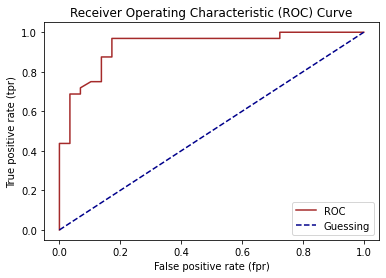

In [86]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="brown", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [87]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_clf_test, Y_clf_probs_positive)

0.9304956896551724

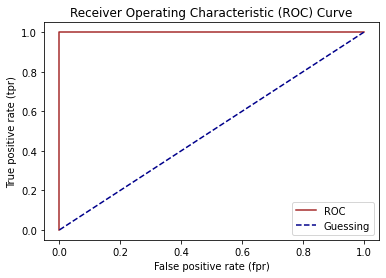

In [88]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_clf_test, Y_clf_test)
plot_roc_curve(fpr, tpr)

In [89]:
# Perfect AUC score
roc_auc_score(Y_clf_test, Y_clf_test)

1.0

#### Confusion matrix
The next way to evaluate a classification model is by using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused.

In [90]:
from sklearn.metrics import confusion_matrix

Y_clf_preds = clf.predict(X_clf_test)

confusion_matrix(Y_clf_test, Y_clf_preds)

array([[24,  5],
       [ 4, 28]])

Again, this is probably easier visualized.

One way to do it is with `pd.crosstab()`.

In [91]:
pd.crosstab(Y_clf_test, 
            Y_clf_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


In [92]:
24+4+5+28 == len(X_clf_test)

True

#### Creating a confusion matrix using Scikit-Learn

Scikit-Learn has multiple different implementations of plotting confusion matrices:

1. [`sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator) - this takes a fitted estimator (like our `clf` model), features (`X`) and labels (`y`), it then uses the trained estimator to make predictions on `X` and compares the predictions to `y` by displaying a confusion matrix.
2. [`sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.

> **Note:** Both of these methods/classes require Scikit-Learn 1.0+. To check your version of Scikit-Learn run:
```python
import sklearn
sklearn.__version__
```
> If you don't have 1.0+, you can upgrade at: https://scikit-learn.org/stable/install.html

![confusion matrix](../images/sklearn-confusion-matrix-anatomy.png)

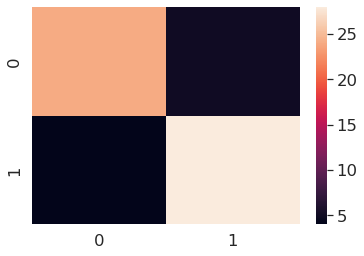

In [93]:
# confusion matrix using seaborn's heatmap
import seaborn as sns

# set font size
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(Y_clf_test,Y_clf_preds)

# Plot using Seaborn
sns.heatmap(conf_mat);

####  install conda packages into current environment through jupyter notebook

import sys  #prefix for environment

!conda install --yes  --prefix (sys,prefix) seaborn

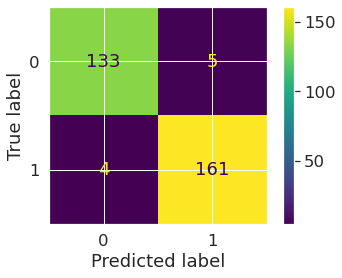

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X_clf, y=Y_clf);

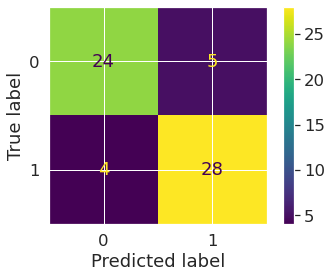

In [95]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=Y_clf_test,y_pred=Y_clf_preds);

**Classification Report**

https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397

In [96]:
from sklearn.metrics import classification_report

print(classification_report(Y_clf_test, Y_clf_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [97]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
    
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.  For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [98]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [99]:
model.score(X_test, Y_test)

0.8066196804802649

In [100]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [101]:
Y_test.mean()

2.0550030959302275

In [102]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
Y_test_mean = np.full(len(Y_test), Y_test.mean())
Y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [103]:
Y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [104]:
r2_score(y_true=Y_test,y_pred=Y_test_mean)

0.0

In [105]:
r2_score(y_true=Y_test,y_pred=Y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [106]:
# MAE
from sklearn.metrics import mean_absolute_error

Y_preds = model.predict(X_test)
mae = mean_absolute_error(Y_test, Y_preds)
mae

0.3265721842781009

In [107]:
df = pd.DataFrame(data={"actual values": Y_test,
                        "predicted values": Y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [108]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32657218427810186

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [109]:
# Mean squared error
from sklearn.metrics import mean_squared_error

Y_preds = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_preds)
mse

0.2534073069137548

In [110]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [111]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean(),squared

(0.253407306913755,
 20046    0.000284
 3024     0.088173
 15663    0.005100
 20484    0.125521
 9814     0.200919
            ...   
 15362    0.170255
 16623    0.518746
 18086    0.026775
 2144     0.000027
 3665     0.026899
 Name: differences, Length: 4128, dtype: float64)

In [112]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16 # increase "squared_differences" for 1 sample

In [113]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [114]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.2572832072079409

In [115]:
# Artificially increase error in "squared_differences" column for ~100 samples
df_large_error.iloc[1:100, 3] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,20.000000
15663,5.00001,4.928596,-0.071414,20.000000
20484,2.18600,2.540290,0.354290,20.000000
9814,2.78000,2.331760,-0.448240,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [116]:
# Calculate MSE with large error(s)
df_large_error["squared_differences"].mean()

0.7333540351264827

### 4.2.3 Finally using the `scoring` parameter

#### Classification

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X_clf = heart_disease.drop("target", axis=1)
Y_clf = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [118]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X_clf, Y_clf, cv=5, scoring=None) # if scoring=None, esitmator's default scoring evaulation metric is used (accuracy for classification models)

# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")
cv_acc

The cross-validated accuracy is: 82.48%


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [119]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X_clf, Y_clf, cv=5, scoring="accuracy")
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

cv_acc

The cross-validated accuracy is: 82.48%


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [120]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X_clf, Y_clf, cv=5, scoring="precision")

# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")
cv_precision

The cross-validated precision is: 0.8329547346025924


array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [121]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X_clf, Y_clf, cv=5, scoring="recall")

# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")
cv_recall

The cross-validated recall is: 0.8545454545454545


array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

#### Regression

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [123]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, Y, cv=3, scoring=None)
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [124]:
np.mean(cv_r2)

0.6545756342466266

In [126]:
# Mean squared error
cv_mse = cross_val_score(model, X_clf, Y_clf, cv=5, scoring="neg_mean_squared_error")
cv_mse # -0.34 is better than -0.52

array([-0.14617049, -0.22336557, -0.14107213, -0.161105  , -0.28671167])

In [127]:
np.mean(cv_mse)

-0.1916849726775956

In [128]:
# Mean absolute error
cv_mae = cross_val_score(model, X_clf, Y_clf, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.33575901639344263

In [129]:
cv_mae

array([-0.33163934, -0.36098361, -0.23967213, -0.30966667, -0.43683333])

## 4.3 Using different evaluation metrics as Scikit-Learn functions

Evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X_clf = heart_disease.drop("target", axis=1)
Y_clf= heart_disease["target"]

# Split data
X_clf_train, X_clf_test, Y_clf_train, Y_clf_test = train_test_split(X_clf, Y_clf, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_clf_train, Y_clf_train)

# Make predictions
Y_clf_preds = clf.predict(X_clf_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(Y_clf_test, Y_clf_preds)*100:.2f}%")
print(f"Precision: {precision_score(Y_clf_test, Y_clf_preds)}")
print(f"Recall: {recall_score(Y_clf_test, Y_clf_preds)}")
print(f"F1: {f1_score(Y_clf_test, Y_clf_preds)}")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [132]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, Y_train)

# Make predictions
Y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(Y_test, Y_preds)}")
print(f"MAE: {mean_absolute_error(Y_test, Y_preds)}")
print(f"MSE: {mean_squared_error(Y_test, Y_preds)}")

Regression metrics on the test set
R2 score: 0.8066196804802649
MAE: 0.3265721842781009
MSE: 0.2534073069137548


## 5. Improving a model 

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better) 
* Could we improve our data? 

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model? 

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [133]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Comparing the metrics of different Scikit-Learn models

One of the most important things when comparing different models is to make sure they're compared on the same data splits.

For example, let's say you have `model_1` and `model_2` which each differ slightly.

If you want to compare and evaulate their results, `model_1` and `model_2` should both be trained on the same data (e.g. `X_train` and `y_train`) and their predictions should each be made on the same data, for example:
* `model_1.fit(X_train, y_train)` -> `model_1.predict(X_test)` -> `model_1_preds`
* `model_2.fit(X_train, y_train)` -> `model_2.predict(X_test)` -> `model_2_preds`

Note the differences here being the two models and the 2 different sets of predictions which can be compared against each other.

Here compares 3 different models on a small dataset.
1. A baseline `RandomForestClassifier` (all default parameters)
2. A `RandomForestClassifier` tuned with `RandomizedSearchCV` (and `refit=True`)
3. A `RandomForestClassifier` tuned with `GridSearchCV` (and `refit=True`)

The most important part is they all use the same data splits created using `train_test_split()` and `np.random.seed(42)`.

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

#### Import and split data

In [135]:
heart_disease = pd.read_csv("../datasets/heart-disease.csv")

# Split into X & y
X_clf = heart_disease.drop("target", axis =1)
Y_clf = heart_disease["target"]

# Split into train & test
np.random.seed(42) # seed for reproducibility
X_clf_train, X_clf_test, Y_clf_train, Y_clf_test = train_test_split(X_clf, Y_clf, test_size=0.2)

![train test valid](../images/sklearn-train-valid-test-annotated.png)

In [136]:
# heart_disease = pd.read_csv("../datasets/heart-disease.csv")

# # Shuffle the data
# heart_disease = heart_disease.sample(frac=1)

# # Split into X & y
# X = heart_disease.drop("target", axis =1)
# Y = heart_disease["target"]

# # Split into train & test
# np.random.seed(42) # seed for reproducibility

# train_split = round(0.7 * len(heart_disease))
# valid_split = round(train_split + 0.15 * len(heart_disease)) # 70% of data
# X_train, Y_train = X[:train_split],Y[:train_split]
# X_valid, Y_valid = X[train_split:valid_split],Y[train_split:valid_split]
# X_test, Y_test = X[valid_split:],Y[valid_split:]

# len(X_train),len(X_valid),len(X_test)

#### Make evaluation function

Our evaluation function will use all of the major classification metric functions from Scikit-Learn.

In [137]:
def evaluate_preds(Y_true, Y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(Y_true, Y_preds)
    precision = precision_score(Y_true, Y_preds)
    recall = recall_score(Y_true, Y_preds)
    f1 = f1_score(Y_true, Y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict


### 5.1 Tuning hyperparameters by hand 

####  Baseline model

Create model with default hyperparameters. See [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) documentation for more.

In [138]:
np.random.seed(42)

# Make & fit baseline model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_clf_train, Y_clf_train)

# Make baseline predictions
Y_clf_preds = clf.predict(X_clf_test)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(Y_clf_test, Y_clf_preds)
baseline_metrics

Acc: 83.61%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


{'accuracy': 0.84, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

### 5.2 Hyperparameter tuning with RandomizedSearchCV


Find hyperparameters with [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

**Note:** Although best parameters are found on different splits of `X_train` and `y_train`, because `refit=True`, once the best parameters are found, they are refit to the entire set of `X_train` and `y_train`. See the [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) and [cross-validation documentation](https://scikit-learn.org/stable/modules/cross_validation.html) for more.

In [139]:
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters grid
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)  # n_jobs - no of processors

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42, # set random_state to 42 for reproducibility
                            refit=True) # set refit=True (default) to refit the best model on the full dataset 

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_clf_train, Y_clf_train) # 'rs' is short for RandomizedSearch

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [140]:
# Check best parameters of RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30}

In [148]:
# Evaluate RandomizedSearch model
rs_y_preds = rs_clf.predict(X_clf_test)

# Evaluate the classifier on validation set
rs_metrics = evaluate_preds(Y_clf_test, rs_y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


### 5.3 Hyperparameter tuning with GridSearchCV

Find best hyperparameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Like brute force , RandomSearchCV limit iteratons

**Note:** Although best parameters are found on different splits of `X_train` and `y_train`, because `refit=True`, once the best parameters are found, they are refit to the entire set of `X_train` and `y_train`. See the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and [cross-validation documentation](https://scikit-learn.org/stable/modules/cross_validation.html) for more.

In [143]:
from sklearn.model_selection import GridSearchCV

# Setup grid-2 (refined version of grid)
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

# 6 * 5 * 3 * 3 * 2 = 540 iterations

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2,
                      refit=True) # set refit=True (default) to refit the best model on the full dataset

# Fit the GridSearchCV version of clf
gs_clf.fit(X_clf_train, Y_clf_train) # 'gs' is short for GridSearch

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [144]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [145]:
# Evaluate GridSearchCV model
gs_y_preds = gs_clf.predict(X_clf_test)

# Evaluate the classifier on validation set
gs_metrics = evaluate_preds(Y_clf_test, gs_y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


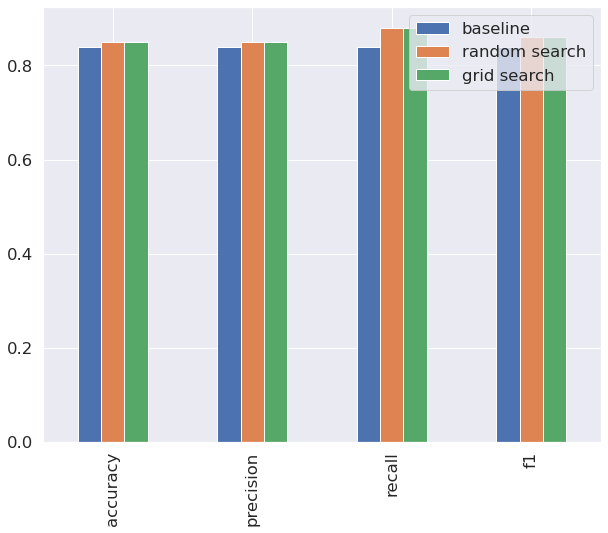

In [149]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

#### Correlation accurary 
1 col - size of length 
2 col - size of the house

1 col increase 2 col also increases , so we can remove in analysis (High correlation)

#### Forward/backward attribute selection

forward - one column go on increases so model increases till even col added not improve accurary
backward - add all col and go on decreasing


## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module - implements python protocol for serializing and deserializing a python object structure
2. With the `joblib` module

**Pickle**

In [153]:
import pickle

# Save an extisting model to file
pickle.dump(gs_clf, open("../pickle/gs_random_random_forest_model_1.pkl", "wb"))

In [154]:
# Load a saved model
loaded_pickle_model = pickle.load(open("../pickle/gs_random_random_forest_model_1.pkl", "rb"))

In [155]:
# Make some predictions
pickle_Y_preds = loaded_pickle_model.predict(X_clf_test)
evaluate_preds(Y_clf_test, pickle_Y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

**Joblib**

In [156]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="../pickle/gs_random_forest_model_1.joblib")

['../pickle/gs_random_forest_model_1.joblib']

In [157]:
# Import a saved joblib model
loaded_joblib_model = load(filename="../pickle/gs_random_forest_model_1.joblib")

In [158]:
# Make and evaluate joblib predictions
joblib_Y_preds = loaded_joblib_model.predict(X_clf_test)
evaluate_preds(Y_clf_test, joblib_Y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

## 7. Putting it all together!

In [160]:
data = pd.read_csv("../datasets/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [161]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [162]:
data.isna().sum()

Make             0
Colour           0
Odometer (KM)    4
Doors            2
Price            1
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [164]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("../datasets/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
Y = data["Price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Fit and score the model
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.25358477087456266

It's also possible to use `GridSearchCV` or `RandomizedSesrchCV` with our `Pipeline`.

In [166]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]    
}

# 16 combination and 5 folds = 16*5 = 80 fits
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, Y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

0.4300544919966699

In [167]:
gs_model.score(X_test, Y_test)

0.4300544919966699

# COMPARISON

[Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

* [LinearSVC](https://scikit-learn.org/stable/modules/svm.html#classification)
* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/neighbors.html) (also known as K-Nearest Neighbors or KNN)
* [SVC](https://scikit-learn.org/stable/modules/svm.html#classification) (also known as support vector classifier, a form of [support vector machine](https://en.wikipedia.org/wiki/Support-vector_machine))
* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (despite the name, this is actually a classifier)
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (an ensemble method and what we used above)


* [RidgeRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
* [SVR(kernel="linear")](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) - short for Support Vector Regressor, a form form of support vector machine.
* [SVR(kernel="rbf")](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) - short for Support Vector Regressor, a form of support vector machine.
* [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) - the regression version of RandomForestClassifier.


In [168]:
# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

To see which model performs best, we'll do the following:
1. Instantiate each model in a dictionary
2. Create an empty results dictionary
3. Fit each model on the training data
4. Score each model on the test data
5. Check the results

In [170]:
# Create a dictionary called models which contains all of the classification models we've imported
# The models dictionary should contain 5 models
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

# Create an empty dictionary called results
results = {}

Since each model we're using has the same `fit()` and `score()` functions, we can loop through our models dictionary and, call `fit()` on the training data and then call `score()` with the test data.

Without manually setting the random state using the `random_state` parameter of some models or using a NumPy random seed, every time you run the cell, you'll get slightly different results.

[NumPy random seed equal to 42](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html).

In [173]:
#set a NumPy random seed equal to 42
np.random.seed(42)

for model_name, model in models.items():
    model.fit(X_clf_train, Y_clf_train)
    results[model_name] = model.score(X_clf_test, Y_clf_test)
    
results

/home/priya/Desktop/ML/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/priya/Desktop/ML/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'SVC': 0.7049180327868853,
 'LogisticRegression': 0.8852459016393442,
 'RandomForestClassifier': 0.8360655737704918}

* Add a NumPy random seed to the cell where you called `train_test_split()` (towards the top of the notebook) and then rerun the cell above

,Accuracy
LinearSVC,0.868852
KNN,0.688525
SVC,0.704918
LogisticRegression,0.885246
RandomForestClassifier,0.836066


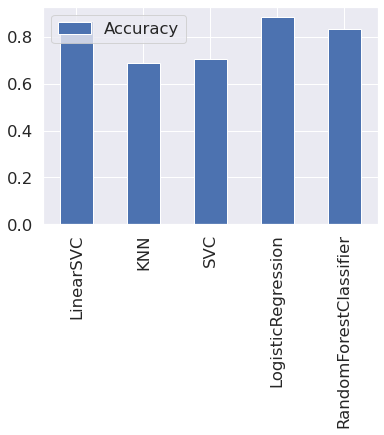

In [175]:
# Create a pandas dataframe with the data as the values of the results dictionary,
# the index as the keys of the results dictionary and a single column called accuracy.
# Be sure to save the dataframe to a variable.
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["Accuracy"])

# Create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar();
results_df

### Hyperparameter Tuning

search something like "MODEL_NAME hyperparameter tuning".

In the case of LogisticRegression, such as [Hyperparameter Tuning Using Grid Search by Chris Albon](https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/).

The article uses [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) but we're going to be using [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

The different hyperparameters to search over have been setup for you in `log_reg_grid` but feel free to change them.

In [177]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

Since we've got a set of hyperparameters we can import `RandomizedSearchCV`, pass it our dictionary of hyperparameters and let it search for the best combination.

In [180]:
# Setup np random seed of 42
np.random.seed(42)

# Import RandomizedSearchCV from sklearn's model_selection module
from sklearn.model_selection import RandomizedSearchCV

# Setup an instance of RandomizedSearchCV with a LogisticRegression() estimator,
# our log_reg_grid as the param_distributions, a cv of 5 and n_iter of 5.
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=2,
                                n_iter=5,
                                verbose=True)

# Fit the instance of RandomizedSearchCV
rs_log_reg.fit(X_clf_train, Y_clf_train);

Fitting 2 folds for each of 5 candidates, totalling 10 fits


Once `RandomizedSearchCV` has finished, we can find the best hyperparmeters it found using the `best_params_` attributes.

In [181]:
# Find the best parameters of the RandomizedSearchCV instance using the best_params_ attribute
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [182]:
# Score the instance of RandomizedSearchCV using the test data
rs_log_reg.score(X_clf_test, Y_clf_test)

0.8852459016393442

### Classifier Model Evaluation

We've tried to find the best hyperparameters on our model using `RandomizedSearchCV` and so far we've only been evaluating our model using the `score()` function which returns accuracy. 

But when it comes to classification, you'll likely want to use a few more evaluation metrics, including:
* [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average. 
* [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) - Proportion of true positives over total number of true positives and false positives. Higher recall leads to less false negatives.
* [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - Combines precision and recall into one metric. 1 is best, 0 is worst.
* [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
* [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html) - [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate.
* [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

Before we get to these, we'll instantiate a new instance of our model using the best hyerparameters found by `RandomizedSearchCV`. 

In [183]:
# Instantiate a LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
clf = LogisticRegression(solver="liblinear", C=0.23357214690901212)

# Fit the new instance of LogisticRegression with the best hyperparameters on the training data 
clf.fit(X_clf_train, Y_clf_train);

Now it's to import the relative Scikit-Learn methods for each of the classification evaluation metrics we're after.

In [184]:
# Import confusion_matrix and classification_report from sklearn's metrics module
from sklearn.metrics import confusion_matrix, classification_report

# Import precision_score, recall_score and f1_score from sklearn's metrics module
from sklearn.metrics import precision_score, recall_score, f1_score

# Import plot_roc_curve from sklearn's metrics module
from sklearn.metrics import plot_roc_curve

Evaluation metrics are very often comparing a model's predictions to some ground truth labels.

Let's make some predictions on the test data using our latest model and save them to `Y_preds`.

In [185]:
# Make predictions on test data and save them
Y_clf_preds = clf.predict(X_clf_test)

Time to use the predictions our model has made to evaluate it beyond accuracy.

In [186]:
# Create a confusion matrix using the confusion_matrix function
confusion_matrix(Y_clf_test, Y_clf_preds)

array([[25,  4],
       [ 3, 29]])

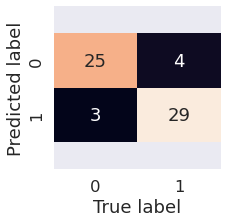

In [187]:
# Import seaborn for improving visualisation of confusion matrix
import seaborn as sns

# Make confusion matrix more visual
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(Y_clf_test, Y_clf_preds)

How about a classification report?

In [189]:
# classification report
print(classification_report(Y_clf_test, _preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Columns in this classification report are.

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

### Building a pipeline

There are ways we could do this with pandas but since we're practicing Scikit-Learn, we'll see how we might do it with the [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class. 

Because we're modifying columns in our dataframe (filling missing values, converting non-numerical data to numbers) we'll need the [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) and [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) classes as well.

Finally, because we'll need to split our data into training and test sets, we'll import `train_test_split` as well.

Since we've fitted some models but only compared them via the default metric contained in the `score()` method (R^2 score or coefficient of determination), let's take the `RidgeRegression` model and evaluate it with a few other [regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

Specifically, let's find:
1. **R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. 
2. **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
3. **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Scikit-Learn has a few classes built-in which are going to help us with these, namely, [`mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html), [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) and [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).